In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

In [2]:
df = pd.read_csv('./data/titanic_clean.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder

# Datos categóricos de ejemplo
animales = ['gato', 'perro', 'pez', 'gato', 'perro']

# Crear una instancia de LabelEncoder
le = LabelEncoder()

# Ajustar y transformar los datos
animales_codificados = le.fit_transform(animales)

# Mostrar los datos codificados
print(animales_codificados)

# Si deseas ver cómo se mapean las etiquetas originales
print(list(le.classes_))

[0 1 2 0 1]
[np.str_('gato'), np.str_('perro'), np.str_('pez')]


In [4]:
label_sex = LabelEncoder()
label_embarked = LabelEncoder()

# Fit and transform on training data
df['Sex'] = label_sex.fit_transform(df['Sex'])
df['Embarked'] = label_embarked.fit_transform(df['Embarked'])

In [5]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
819,0,3,1,10.0,3,2,27.900,2
544,0,1,1,50.0,1,0,106.425,0
586,0,2,1,47.0,0,0,15.000,2
675,0,3,1,18.0,0,0,7.775,2
348,1,3,1,3.0,1,1,15.900,2


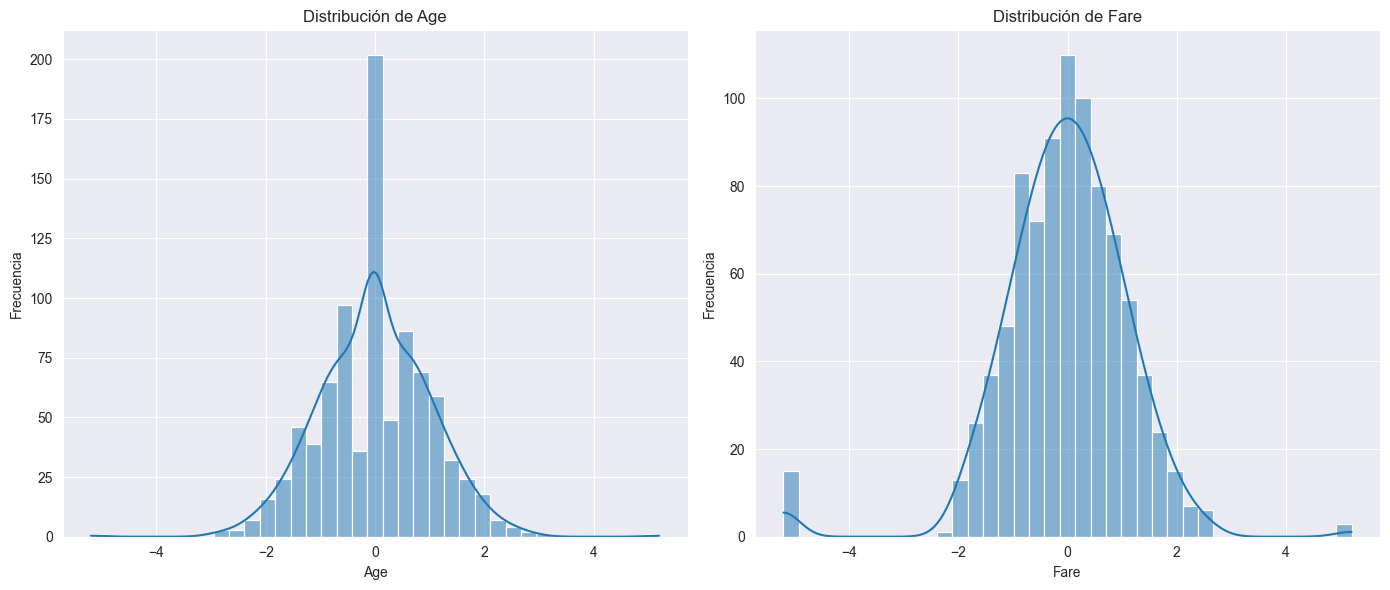

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribución de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

# Gráfica de la distribución de Fare
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribución de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

In [7]:
qun_tra_age = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)
qun_tra_fare = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)

df['Age'] = qun_tra_age.fit_transform(df[['Age']])
df['Fare'] = qun_tra_fare.fit_transform(df[['Fare']])

In [9]:
# Creamos una instancia de MinMaxScaler para cada columna que queremos escalar
# MinMaxScaler: Transforma los valores para que esten entre 0 y 1, para qe esten en la misma escala todos
mms_pclass= MinMaxScaler()
mms_sex = MinMaxScaler()
mms_age = MinMaxScaler()
mms_sibsp = MinMaxScaler()
mms_parch = MinMaxScaler()
mms_fare = MinMaxScaler()
mms_embarked = MinMaxScaler()

# Ejecutar escalado a cada columna
# Fit: Calcula el minimo y maximo de la columna
# Transform: Aplica la formula para escalar los valores
# Se utiliza doble corchete [[]] para pasar un df de una sola dimension
df['Pclass'] = mms_pclass.fit_transform(df[['Pclass']])
df['Sex'] = mms_sex.fit_transform(df[['Sex']])
df['Age'] = mms_age.fit_transform(df[['Age']])
df['SibSp'] = mms_sibsp.fit_transform(df[['SibSp']])
df['Parch'] = mms_parch.fit_transform(df[['Parch']])
df['Fare'] = mms_fare.fit_transform(df[['Fare']])
df['Embarked'] = mms_embarked.fit_transform(df[['Embarked']])

In [10]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
877,0,1.0,1.0,0.407990,0.0,0.000000,0.428458,1.0
782,0,0.0,1.0,0.528932,0.0,0.000000,0.559943,1.0
377,0,0.0,1.0,0.467510,0.0,0.333333,0.701578,0.0
194,1,0.0,0.0,0.606848,0.0,0.000000,0.551374,0.0
303,1,0.5,0.0,0.497826,0.0,0.000000,0.481284,0.5


In [11]:
df.to_csv('./data/titanic_procesado.csv', index=False)